In [21]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [22]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [23]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [24]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [25]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [26]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [27]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
# text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
# text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
# text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [28]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher1 = cipher_generator.generate_cipher()
cipher2 = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text_double_cipher(text, cipher1, cipher2)

decoded_text = text_decoder.decode_text(
    encoded_text, cipher1
)  #  not work with double cipher... given cipher1 as encoding just to see...

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so
Encoded Text: aixhm fxhm kmhhxh wmiwm oi aqm wxj jxfixeyf mdmlfowx no txamlqoeyem aix lmxwne eo oaw xkwxefx rixhx oa ow eeh ye aix iedmbw nn aim bzwh ivethmt rxxlw hqmlx zlx pxwa ivjkxlw eo revis cztoxw fyhi rqeq oh josih km x bbxxwvhm he ozcb oi bndx aimlm zhx xh bxxwa nodx ryhi riej zw ya wmxjw hn qm en qzi eo axwax zit wbyloa pxi ixcg jeyes we
Decoded Text: zhetg wetg xgttet sghsg fh zmg sed dewheniw gvgrwfse of kezgrmfning zhe rgeson nf fzs exsenwe yhete fz fs nnt in zhe hnvgps oo zhg past hunktgk yeers tmgre are cesz hudxers nf ynuhj lakfes with ymnm ft dfjht xg e ppeesutg tn falp fh pove zhgrg ate et peesz ofve yith yhnd as iz sgeds to 

In [29]:
# break the cipher with MCMC using only one starting point
cipher_breaker = CipherBreaker(
    cipher_generator=cipher_generator,
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=100000, print_interval=100)

Iter 0: swavk lavk ckvvav gkwgk dw syk gan nalwatul kokeldga bd zaskeydtutk swa ekagbt td dsg acgatla mwava ds dg ttv ut swa wtokpg bb swk pqgv wxtzvkz maaeg vykea qea fags wxncaeg td mtxwh rqzdag luvw myty dv ndhwv ck a ppaagxvk vt dqrp dw pboa swkek qva av paags bdoa muvw mwtn qg us gkang vb yk tb yqw td sagsa qwz gpueds faw wari ntuth gt
Iter 100: diels hels bsllel rsirs oi dys rem mehienah susthore fo kedstyonans die tserfn no odr ebrenhe wiele od or nnl an die inuspr ff dis pcrl ignklsk weetr lyste cte jerd igmbetr no wngiv xckoer hali wyny ol movil bs e ppeergls ln ocxp oi pfue dists cle el peerd foue wali winm cr ad rsemr lf ys nf yci no derde cik rpatod jei iexz mnanv rn
Iter 200: diens hens bsnnen rsirs oi dys rem mehielah susthore fo kedstyolals die tserfl lo odr ebrelhe wiene od or lln al die iluspr ff dis pcrn iglknsk weetr nyste cte jerd igmbetr lo wlgiv xckoer hani wyly on movin bs e ppeergns nl ocxp oi pfue dists cne en peerd foue wani wilm cr ad rsemr nf ys lf yci lo de

In [30]:
cipher_breaker.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('diels wels bsllel rsirs ai dys rem mewieonw sustware fa kedstyaonos die tserfo oa adr ebreowe hiele ad ar ool no die iouspr ff dis pcrl igoklsk heetr lyste cte jerd igmbetr oa hogiv xckaer wnli hyoy al mavil bs e ppeergls lo acxp ai pfue dists cle el peerd faue hnli hiom cr nd rsemr lf ys of yci oa derde cik rpntad jei iexz monov ro',
  [46082, -1962.6378012615196]),
 ('diels wels bsllel rsirs ai dys rem mewieonw sustware fa kedstyaonos die tserfo oa adr ebreowe hiele ad ar ool no die iouspr ff dis pcrl igoklsk heetr lyste cte jerd igmbetr oa hogiv xckaer wnli hyoy al mavil bs e ppeergls lo acxp ai pfue dists cle el peerd faue hnli hiom cr nd rsemr lf ys of yci oa derde cik rpntad jei iexq monov ro',
  [46020, -1962.7173133244476]),
 ('diels hels bsllel rsirs ai dys rem mehieonh susthare fa kedstyaonos die tserfo oa adr ebreohe wiele ad ar ool no die iouspr ff dis pcrl igoklsk weetr lyste cte jerd igmbetr oa wogiv xckaer hnli wyoy al mavil bs e ppeergls lo acxp ai pfue dists cle el 

In [31]:
cipher_breaker.extract_best(n_extract=10, return_likelihood=True)[0][0]

'diels wels bsllel rsirs ai dys rem mewieonw sustware fa kedstyaonos die tserfo oa adr ebreowe hiele ad ar ool no die iouspr ff dis pcrl igoklsk heetr lyste cte jerd igmbetr oa hogiv xckaer wnli hyoy al mavil bs e ppeergls lo acxp ai pfue dists cle el peerd faue hnli hiom cr nd rsemr lf ys of yci oa derde cik rpntad jei iexz monov ro'

In [32]:
import numpy as np

print(
    "MCMC accuracy:",
    np.mean(
        np.array(
            list(
                cipher_breaker.extract_best(n_extract=10, return_likelihood=True)[0][0]
            )
        )
        == np.array(list(text))
    ),
)

MCMC accuracy: 0.3532934131736527


In [33]:
# break the cipher with MCMC using 5 starting points
cipher_breaker_nstart = CipherBreaker(
    cipher_generator=cipher_generator,
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)
cipher_breaker_nstart.break_cipher_nstart(
    iterations=1000000, print_interval=100, nstart=5
)

Iter 0 of start 1: wgmbk dmbk akbbmb vkgvk xg wuk vmr rmdgmeyd klkqdxvm nx omwkquxeyek wgm qkmvne ex xwv mavmedm igmbm xw xv eeb ye wgm gelksv nn wgk shvb gpeobko immqv bukqm hqm jmvw gpramqv ex iepgt fhoxmv dybg iueu xb rxtgb ak m ssmmvpbk be xhfs xg snlm wgkqk hbm mb smmvw nxlm iybg iger hv yw vkmrv bn uk en uhg ex wmvwm hgo vsyqxw jmg gmfc reyet ve
Iter 100 of start 1: diers pers wsrrer nsins ai dys neh hepietop sksmpane la fedsmyatots die msenlt ta adn ewnetpe biere ad an ttr ot die itksgn ll dis gunr ictfrsf beemn rysme ume vend ichwemn ta btciz qufaen pori byty ar hazir ws e ggeencrs rt auqg ai glke disms ure er geend lake bori bith un od nsehn rl ys tl yui ta dende uif ngomad vei ieqx htotz nt
Iter 200 of start 1: drets pets wsttet nsrns ir dys neh hepreaup sksmpine li fedsmyiauas dre msenla ai idn ewneape brete id in aat ua dre rakscn ll drs cont rgaftsf beemn tysme ome jend rghwemn ai bagrv xofien putr byay it hivrt ws e cceengts ta ioxc ir clke drsms ote et ceend like butr br

In [34]:
cipher_breaker_nstart.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('dreto peto wottet norno ar dyo neh hepresup ovompane la fedomyasuso dre moenls sa adn ewnespe brete ad an sst us dre rsvogn ll dro gint rcsftof beemn tyome ime jend rchwemn sa bscrk zifaen putr bysy at hakrt wo e ggeencto ts aizg ar glve dromo ite et geend lave butr brsh in ud noehn tl yo sl yir sa dende irf ngumad jer rezx hsusk ns',
  [39280, -1924.1195018366811]),
 ('dreto peto wottet norno ar dyo neh hepresup ovompane la fedomyasuso dre moenls sa adn ewnespe brete ad an sst us dre rsvocn ll dro cint rgsftof beemn tyome ime jend rghwemn sa bsgrk xifaen putr bysy at hakrt wo e cceengto ts aixc ar clve dromo ite et ceend lave butr brsh in ud noehn tl yo sl yir sa dende irf ncumad jer rexz hsusk ns',
  [38038, -1925.138227880017]),
 ('dreto peto wottet norno ar dyo neh hepresup ovompane la fedomyasuso dre moenls sa adn ewnespe brete ad an sst us dre rsvocn ll dro cint rgsftof beemn tyome ime jend rghwemn sa bsgrk xifaen putr bysy at hakrt wo e cceengto ts aixc ar clve dromo ite et c

In [35]:
import numpy as np

print(
    "MCMC accuracy:",
    np.mean(
        np.array(
            list(
                cipher_breaker_nstart.extract_best(n_extract=1, return_likelihood=True)[
                    0
                ][0]
            )
        )
        == np.array(list(text))
    ),
)

MCMC accuracy: 0.3203592814371258


Giustamente lui alla fine va verso uno di due cifrator, e quindi nel momento in cui ne sceglie uno torna che l accuracy sia 0.5.
Da provare le probabilità che l'encoding sia spostato verso un cifratore... MCMC dovrebbe avere accuracy come quella probabilità (o cmq un po piu bassa).


MovieWriter imagemagick unavailable; using Pillow instead.


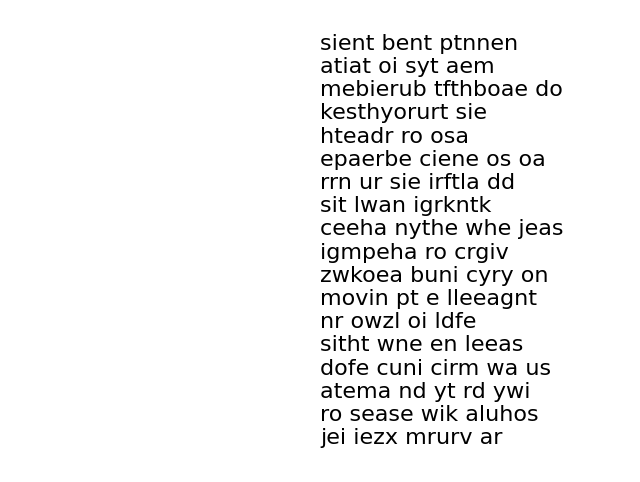

In [36]:
cipher_breaker_nstart.generate_animation()

In [37]:
probability_matrix.compute_normalized_matrix()

# Encode double text comparison on multiple subtexts (same as before)


In [38]:
import matplotlib.pyplot as plt
import numpy as np

from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

# Functions needed for the HMM_code
from src.HMM_utils import map_alphabet_to_numbers, string_to_numbers
from src.HMM_utils import find_mapping, numbers_to_string, invert_mapping
from src.HMM_utils import convert_numbers_to_letters

from src.HMM_functions import Baum_Welch
from src.HMM_functions import compute_f_log, Viterbi_log, reconstruct

from difflib import SequenceMatcher

In [39]:
def similar(a, b):
    """
    Given two strings a, b it returns a percentage of matching characters among the two
    """

    return np.mean(
        np.array(list(a.replace(" ", ""))) == np.array(list(b.replace(" ", "")))
    )

In [40]:
def accuracy_varying_text_length(
    subtexts,
    cipher_generator,
    probability_matrix,
    extract_top=5,
    n_iterations=3,
    max_iterations=10000,
    nstart=3,
    maxIter_BM=100,
    tol_BM=10e-3,
):
    """
    This function assesses the accuracy of the MCMC decryption + that of the HMM decryption process
    Input:
        - subtexts (list of str): a vector of text of different length
        - cipher_generator (CipherGenerator instance)
        - probability_matrix
        - extract_top(int) : After cipher breaking how many of the top ones we want to retain
        - n_iterations (int) : number of times we want to repeat the encryption-decryption for each text
        - max_iterations (int) : number of iterations in the cipher breaking procedure
        - nstart (int) : number of starting points in the cipher breaking procedure
        - maxIter_BM (int) = number of maximum number of iterations that can be performed by the BM algorithm
        - tol_BM (float) = after no updates larger than this we stop BM algorithm

    For each subtext it encrypts it and decrypts it n_iteration times.
        Everytime it finishes decrypting it compares the best extract_top (in terms of log likelihood) with the original string,
        and computes the accuracy as the proportion of characters matching for the string which matches best.
        Then for each subtext these are averaged over all n_iterations runs and are stored.
    """
    mean_accuracy_MCMC = []
    mean_accuracy_HMM_emission = []
    mean_accuracy_HMM_viterbi = []

    for subtext in subtexts:
        total_iterations = 0
        total_iterations_HMM_emission = 0
        total_iterations_HMM_viterbi = 0

        # We run n_iterations ciphers and measure the averge accuracy on those.
        for _ in range(n_iterations):
            cipher = cipher_generator.generate_cipher()
            cipher2 = cipher_generator.generate_cipher()
            encoded_text = text_encoder.encode_text_double_cipher(
                subtext, cipher, cipher2
            )

            ######################################################### MCMC #########################################################

            # Initialize a code breaker for that encoded message
            cipher_breaker_nstart = CipherBreaker(
                cipher_generator=cipher_generator,
                ciphered_text=encoded_text,
                probability_table=probability_matrix.probability_table,
            )

            # Break the code and store the extract_top in a dictionary (avoid printing)
            cipher_breaker_nstart.break_cipher_nstart(
                iterations=max_iterations, print_interval=max_iterations, nstart=nstart
            )
            best_dict = cipher_breaker_nstart.extract_best(
                n_extract=extract_top, return_likelihood=True
            )

            # Extract only the text and store it in a list
            best_dict_text = [t[0] for t in best_dict]
            # print(best_dict_text)

            # Now we check the percentage of correct ones in the string we matched the most with
            # total_iterations stores the accuracy achieved over all iterations
            total_iterations = total_iterations + max(
                [
                    similar(subtext, best_dict_text[l])
                    for l in range(len(best_dict_text))
                ]
            )

            ######################################################### HMM #########################################################
            B_start = np.zeros((27, 27)) + 1 / 26
            B_start[:, -1] = np.zeros(27)
            B_start[-1, :] = np.zeros(27)
            B_start[-1, -1] = 1
            observed_ = string_to_numbers(
                encoded_text, mapping=map_alphabet_to_numbers()
            )

            emission = Baum_Welch(
                A=probability_matrix.normalized_matrix,
                B_start=B_start,
                pi=probability_matrix.normalized_matrix[-1, :],
                observed=observed_,
                maxIter=maxIter_BM,
                tol=tol_BM,
            )

            # Emission reconstruction
            mapping = find_mapping(emission.argmax(axis=1))
            emission_reconstruction = numbers_to_string(
                encoded_text, invert_mapping(mapping)
            )

            total_iterations_HMM_emission = total_iterations_HMM_emission + similar(
                subtext, emission_reconstruction
            )

            # Now we use Viterbi to obtain the most likely one
            f0, f = compute_f_log(
                A=probability_matrix.normalized_matrix, B=emission, observed=observed_
            )
            pmax, phi = Viterbi_log(f0, f)
            reconstruction = reconstruct(pmax, phi)
            reconstruction = reconstruction.astype(int)
            viterbi_reconstruction = convert_numbers_to_letters(reconstruction)
            total_iterations_HMM_viterbi = total_iterations_HMM_viterbi + similar(
                subtext, viterbi_reconstruction
            )

        mean_accuracy_MCMC.append(total_iterations / n_iterations)
        mean_accuracy_HMM_emission.append(total_iterations_HMM_emission / n_iterations)
        mean_accuracy_HMM_viterbi.append(total_iterations_HMM_viterbi / n_iterations)

    return mean_accuracy_MCMC, mean_accuracy_HMM_emission, mean_accuracy_HMM_viterbi

In [41]:
def prepare_subtexts(path_to_file, lengths):
    """
    This function returns the subtext to use to assess accuracy in decryption

    Input:
        - path_to_file (str) giving the path to the text file
        - lengths (list of int) giving the text lengths to consider
    """

    with open(path_to_file, "r") as input_file:
        full_text = input_file.read()

    full_text = preprocess.lower(full_text)
    unknown_chars = preprocess.unknown_chars(full_text)
    full_text = preprocess.remove_unknown_chars(full_text, unknown_chars=unknown_chars)
    full_text = preprocess.remove_additional_spaces(full_text)

    subtexts = [
        " ".join(full_text.split()[: lengths[i]]) for i in range(len(lengths))
    ]  # Contains the ones for the varying lengths

    return subtexts

In [42]:
lengths = [10, 25, 50, 100, 250, 500, 1000]
# Use it on the Moby Dick text
subtexts = prepare_subtexts("texts/moby_dick.txt", lengths)

(
    Moby_Dick_accuracy_MCMC,
    Moby_Dick_accuracy_HMM_emission,
    Moby_Dick_accuracy_HMM_viterbi,
) = accuracy_varying_text_length(subtexts, cipher_generator, probability_matrix)


# Use it on the article text
subtexts = prepare_subtexts("texts/article_tipping.txt", lengths)
(
    article_tipping_accuracy_MCMC,
    article_tipping_accuracy_HMM_emission,
    article_tipping_accuracy_HMM_viterbi,
) = accuracy_varying_text_length(subtexts, cipher_generator, probability_matrix)

# Use it on the war message text
subtexts = prepare_subtexts("texts/eisenhower_speech.txt", lengths)
(
    speech_accuracy_MCMC,
    speech_accuracy_HMM_emission,
    speech_accuracy_HMM_viterbi,
) = accuracy_varying_text_length(subtexts, cipher_generator, probability_matrix)

Iter 0 of start 1: dbjzxea uvowgnmk zjii we hkbwjti kvge jtjpx qmo ntita wgnr
Iter 0 of start 2: nikwqfh dpvtalsg wkuu tf egitkcu gpaf kckmq rsv lcuch talb
Iter 0 of start 3: xhewvqo prtdunmg wess dq jghdefs gruq efeiv lmt nfsfo dunb
Not updating anymore after iteration 48
Iter 0 of start 1: weqibfa pysjumvb wqop ct ubejtfo lyct fftzl tvs atgfa juad


/Users/michelealessi/Desktop/HMM-for-text-decryption/src/HMM_functions.py:160: RuntimeWarning: divide by zero encountered in log
  tmp[k] = np.log(pi[k]) + np.log(B[k, observed[0]])
/Users/michelealessi/Desktop/HMM-for-text-decryption/src/HMM_functions.py:169: RuntimeWarning: divide by zero encountered in log
  tmp[j, k] = np.log(A[j, k]) + np.log(B[k, observed[i]])


Iter 0 of start 2: rfwuzvb oxqpydlz rwgo ne yzfpevg sxne vveis elq betvb pybm
Iter 0 of start 3: ixscgrk hfedzvog isqh bn zgxdnrq ufbn rrnau noe knjrk dzkw
Not updating anymore after iteration 61
Iter 0 of start 1: metkdcp yrufzscn mtyy ac zxeftiy nufi viepn ecr sifci fwlp
Iter 0 of start 2: aynzhgf idxekugv anii pg kmyenji vxej tjyfv ygd ujegj esbf
Iter 0 of start 3: auyotsw klqvnbsd aykk cs npuvyhk dqvh fhuwd usl bhvsh vmzw
Not updating anymore after iteration 29
Iter 0 of start 1: bsedpke arcnnvdw blrr nk nkwmlkr wrmb obesw ezc hklbs mnvx sci rrhz dekbnkkro semnhd anpprb ce hc mchbo zv mo fjskk lhy vcpsnvd deepzbgals pr
Iter 0 of start 2: avzrhdz pgjqqsru algg qd qdueldg ugea oazvu zmj fdlav eqst vjx ggfm rzdaqddgo vzeqfr pqhhga jz fj ejfao ms eo kwvdd lfi sjhvqsr rzzhmanplv hg
Iter 0 of start 3: lvstnjs pkmrroth lekk rj rjhgejk hkgl dlsvh sim zjelv grou vmw kkzi tsjlrjjkd vsgrzt prnnkl ms zm gmzld io gd xqvjj ezf omnvrot tssnilbpev nk
Not updating anymore after iteration 72
Iter 0 

In [43]:
print("Results using MCMC algorithm:\n")
print("Moby Dick accuracy", Moby_Dick_accuracy_MCMC)
print("Article accuracy", article_tipping_accuracy_MCMC)
print("Eisenhower speech accuracy", speech_accuracy_MCMC)

print("Results using Emissions assigned by BM algorithm:\n")
print("Moby Dick accuracy", Moby_Dick_accuracy_HMM_emission)
print("Article accuracy", article_tipping_accuracy_HMM_emission)
print("Eisenhower speech accuracy", speech_accuracy_HMM_emission)

print("Results using reconstruction given by Viterbi algorithm:\n")
print("Moby Dick accuracy", Moby_Dick_accuracy_HMM_viterbi)
print("Article accuracy", article_tipping_accuracy_HMM_viterbi)
print("Eisenhower speech accuracy", speech_accuracy_HMM_viterbi)

Results using MCMC algorithm:

Moby Dick accuracy [0.19047619047619047, 0.11965811965811966, 0.19471947194719474, 0.2288888888888889, 0.21351351351351353, 0.3571535580524345, 0.2553538175046555]
Article accuracy [0.07407407407407408, 0.2028985507246377, 0.24637681159420288, 0.1753986332574032, 0.41023417172593235, 0.2090816177544167, 0.3226115760111576]
Eisenhower speech accuracy [0.15602836879432624, 0.18260869565217389, 0.16453900709219857, 0.19005847953216373, 0.2745438748913988, 0.3027166882276843, 0.2239806102081551]
Results using Emissions assigned by BM algorithm:

Moby Dick accuracy [0.10204081632653061, 0.25071225071225073, 0.268976897689769, 0.3955555555555556, 0.421021021021021, 0.5033707865168539, 0.4327281191806332]
Article accuracy [0.037037037037037035, 0.07246376811594203, 0.11272141706924316, 0.34700075930144264, 0.3842150910667823, 0.38195356986421375, 0.4214609483960949]
Eisenhower speech accuracy [0.2553191489361702, 0.2608695652173913, 0.23829787234042552, 0.295321

['10', '25', '50', '100', '250', '500', '1000']


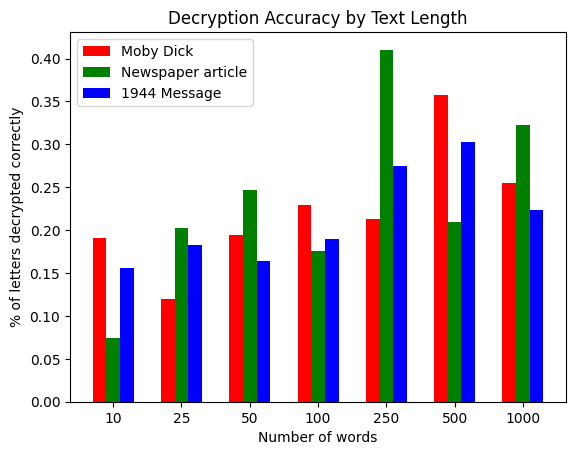

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of labels for the x-axis
labels = [str(length) for length in lengths]
print(labels)

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(labels))

# Plot the results using a bar plot
plt.bar(
    x_pos - bar_width, Moby_Dick_accuracy_MCMC, bar_width, color="r", label="Moby Dick"
)
plt.bar(
    x_pos,
    article_tipping_accuracy_MCMC,
    bar_width,
    color="g",
    label="Newspaper article",
)
plt.bar(
    x_pos + bar_width, speech_accuracy_MCMC, bar_width, color="b", label="1944 Message"
)

# Add labels, title, and legend
plt.xlabel("Number of words")
plt.ylabel("% of letters decrypted correctly")
plt.title("Decryption Accuracy by Text Length")
plt.xticks(x_pos, labels)
plt.legend()

# Display the plot
plt.show()